In [354]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.precision',10)
from matplotlib import rcParams
import scipy.stats as stats
from matplotlib.pyplot import figure
rcParams['figure.figsize'] = (15,5)

In [355]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [356]:
dataset.shape

(1338, 7)

In [357]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [358]:
dataset['sexx'] = dataset['sex'].replace({'male':1,'female':0})
dataset['smokerx'] = dataset['smoker'].replace({'yes':1 , 'no':0})

In [359]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,sexx,smokerx
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [360]:
dataset.describe()

,age,bmi,children,charges,sexx,smokerx
count,1338.0000000000,1338.0000000000,1338.0000000000,1338.0000000000,1338.0000000000,1338.0000000000
mean,39.2070254111,30.6633968610,1.0949177877,13270.4222651413,0.5052316891,0.2047832586
std,14.0499603792,6.0981869117,1.2054927398,12110.0112366940,0.5001595693,0.4036940375
min,18.0000000000,15.9600000000,0.0000000000,1121.8739000000,0.0000000000,0.0000000000
25%,27.0000000000,26.2962500000,0.0000000000,4740.2871500000,0.0000000000,0.0000000000
50%,39.0000000000,30.4000000000,1.0000000000,9382.0330000000,1.0000000000,0.0000000000
75%,51.0000000000,34.6937500000,2.0000000000,16639.9125150000,1.0000000000,0.0000000000
max,64.0000000000,53.1300000000,5.0000000000,63770.4280100000,1.0000000000,1.0000000000


As we can see the smoker has the highest correlation with charges

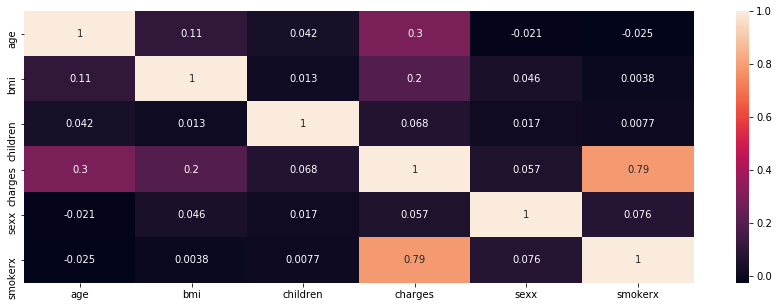

In [361]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix , annot=correlation_matrix )
plt.show()

In [364]:
# Stratified Age group
dataset['agegrp'] = pd.cut(dataset.age , [17,30,40,50,60,70])

In [365]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,sexx,smokerx,agegrp
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,"(17, 30]"
1,18,male,33.770,1,no,southeast,1725.55230,1,0,"(17, 30]"
2,28,male,33.000,3,no,southeast,4449.46200,1,0,"(17, 30]"
3,33,male,22.705,0,no,northwest,21984.47061,1,0,"(30, 40]"
4,32,male,28.880,0,no,northwest,3866.85520,1,0,"(30, 40]"


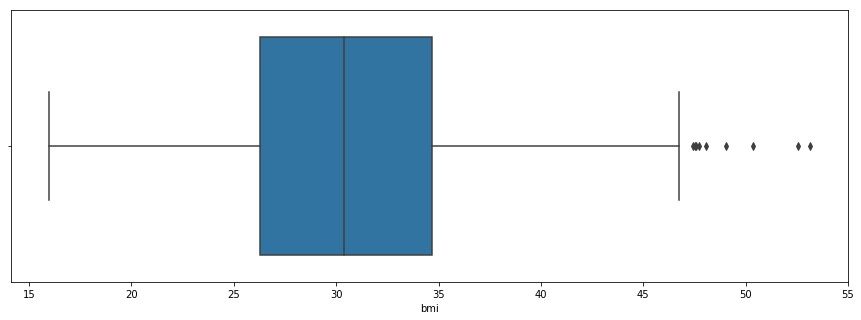

In [366]:
sns.boxplot(dataset.bmi)

In [416]:
dataset.groupby(['agegrp','smoker'])['charges'].sum(axis = 0).unstack()

smoker,no,yes
agegrp,,
"(17, 30]",1.5573456683e+06,2.6151674426e+06
"(30, 40]",1.3461024227e+06,1.6451999011e+06
"(40, 50]",2.1168522038e+06,2.0369019009e+06
"(50, 60]",2.8934648438e+06,1.6280427383e+06
"(60, 70]",1.0602963303e+06,8.5645153895e+05


As we can clearly see that the charges for non smokers is lower as compared with smokers

Text(0.5,1,'Distribution of charges for non smokers')

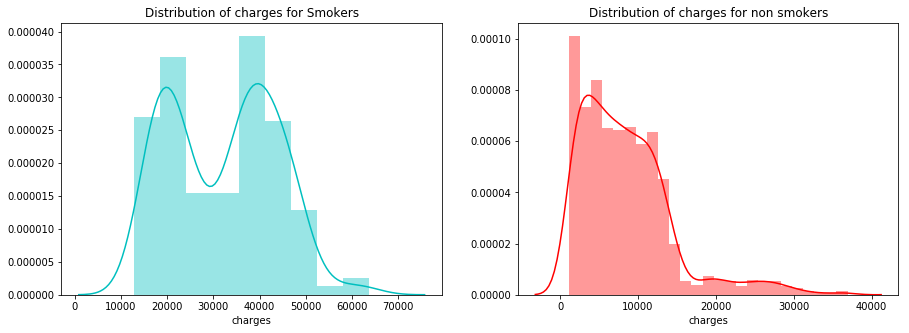

In [370]:
ax = plt.subplot(121)
sns.distplot(dataset[dataset.smokerx==1]['charges'] , ax = ax , color = 'c').set_title('Distribution of charges for Smokers')

ax = plt.subplot(122)
sns.distplot(dataset[dataset.smokerx == 0]['charges'] , ax = ax , color = 'r').set_title('Distribution of charges for non smokers')


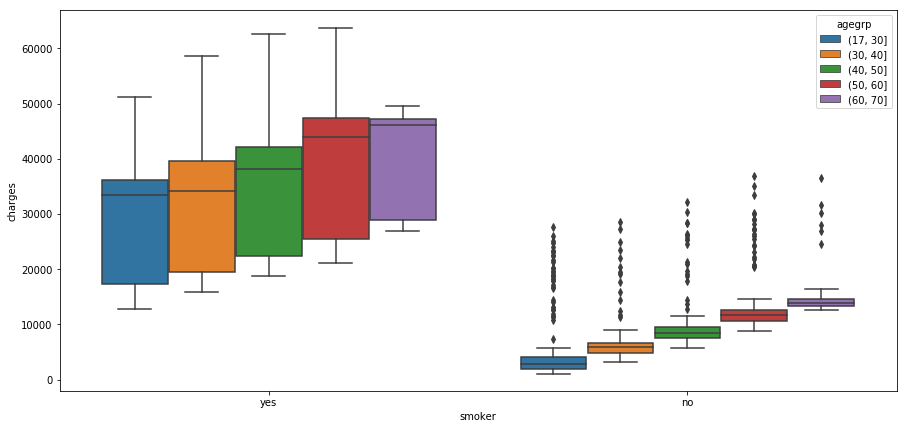

In [371]:
plt.figure(figsize = (15,7))
sns.boxplot(y = 'charges' , x = 'smoker' , hue = 'agegrp' , data = dataset)

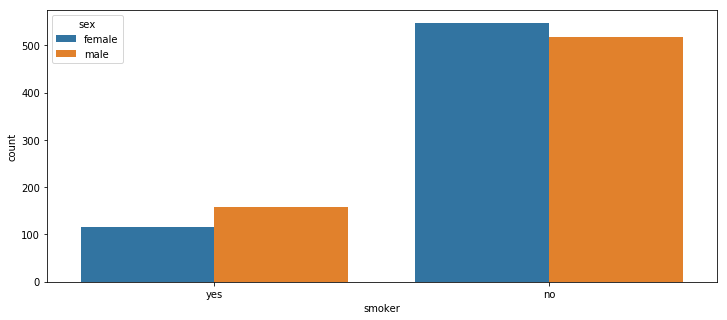

In [372]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'smoker' , hue = 'sex'  , data = dataset)

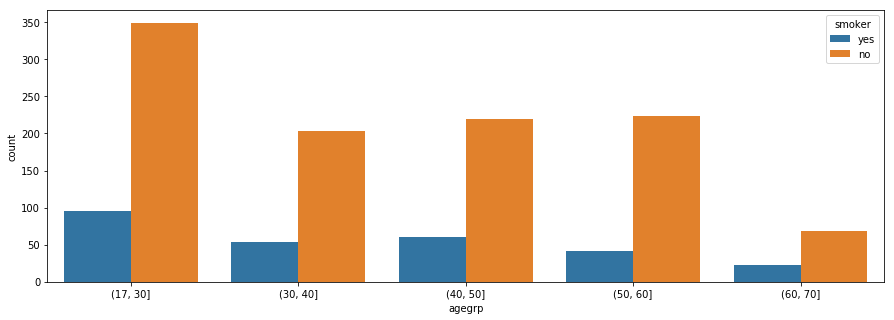

In [373]:
sns.countplot(x = 'agegrp' , hue = 'smoker' , data = dataset )

In [374]:
dx = dataset.groupby(['agegrp','smoker'])['charges'].sum().unstack().reset_index()
dx

smoker,agegrp,no,yes
0,"(17, 30]",1.5573456683e+06,2.6151674426e+06
1,"(30, 40]",1.3461024227e+06,1.6451999011e+06
2,"(40, 50]",2.1168522038e+06,2.0369019009e+06
3,"(50, 60]",2.8934648438e+06,1.6280427383e+06
4,"(60, 70]",1.0602963303e+06,8.5645153895e+05


In [375]:
dx.columns = ['agegrp','Non Smoker' , 'Smoker']
dx

,agegrp,Non Smoker,Smoker
0,"(17, 30]",1.5573456683e+06,2.6151674426e+06
1,"(30, 40]",1.3461024227e+06,1.6451999011e+06
2,"(40, 50]",2.1168522038e+06,2.0369019009e+06
3,"(50, 60]",2.8934648438e+06,1.6280427383e+06
4,"(60, 70]",1.0602963303e+06,8.5645153895e+05


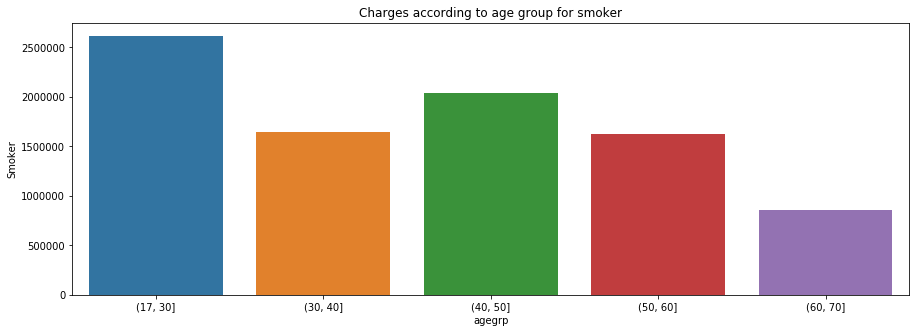

In [376]:
sns.barplot(x = 'agegrp' , y = 'Smoker'  , data = dx).set(title = 'Charges according to age group for smoker')
plt.show()

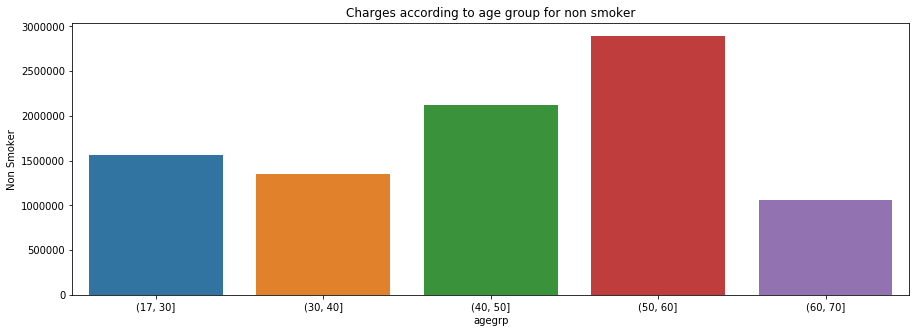

In [377]:
sns.barplot(x = 'agegrp' , y = 'Non Smoker'  , data = dx).set(title = 'Charges according to age group for non smoker')
plt.show()

[Text(0.5,1,'Charges according to age groups stratified by Smoker')]

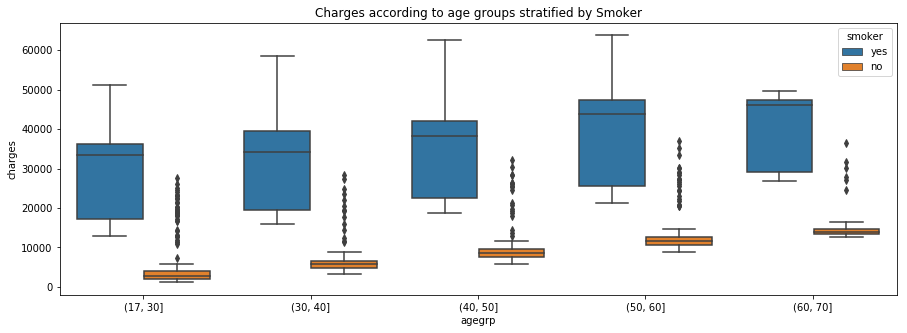

In [378]:
plt.figure()
sns.boxplot(x = 'agegrp' , y = 'charges'  , hue = 'smoker' , data = dataset).set(title = 'Charges according to age groups stratified by Smoker')

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


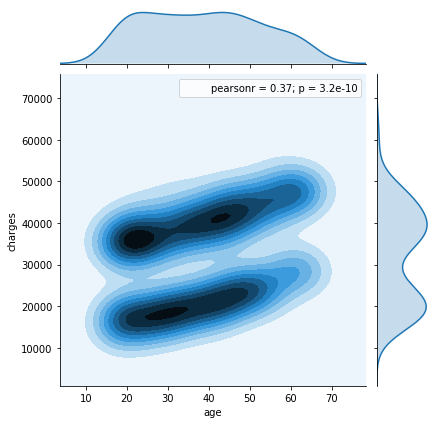

In [380]:
_ = sns.jointplot(x = 'age' , y = 'charges'  , data = dataset[dataset.smokerx == 1] , kind = 'kde').annotate(stats.pearsonr)

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


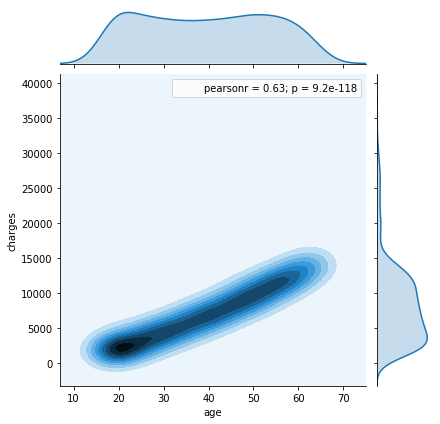

In [381]:
# For non smokers, we can clearly see the correlation of charges is higher in this case
g = sns.jointplot(x = 'age' , y = 'charges'  , data = dataset[dataset.smokerx == 0] , kind = 'kde').annotate(stats.pearsonr)

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x360 with 0 Axes>

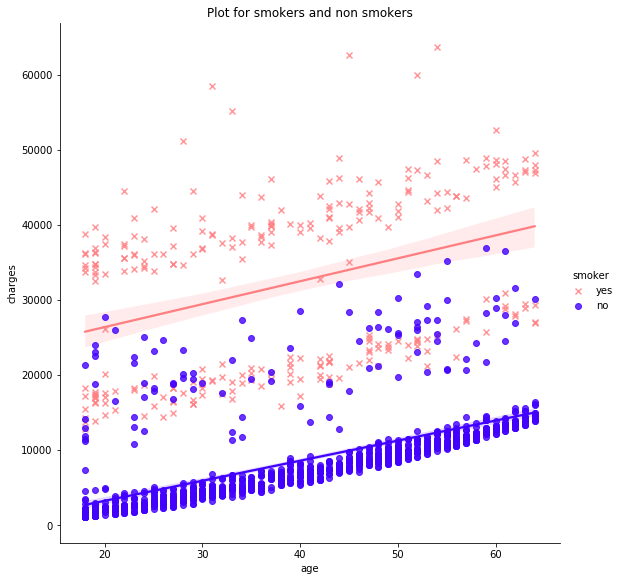

In [382]:
plt.figure(figsize = (15,5))
sns.lmplot(x = 'age'  , y = 'charges' , hue = 'smoker' , data = dataset , palette='gnuplot2_r' , markers = ['x','o'] , size= 8).set(title = 'Plot for smokers and non smokers')
plt.show()

### Now Let's look at region

In [383]:
dataset.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [384]:
dx = dataset.groupby(['region','smoker'])['charges'].mean().unstack().reset_index()
dx.columns = ['region','non smoker' , 'smoker']
dx

,region,non smoker,smoker
0,northeast,9165.5316717082,29673.5364728358
1,northwest,8556.4637152060,30192.0031824138
2,southeast,8032.2163089377,34844.9968236264
3,southwest,8019.2845130712,32269.0634936207


These below results shows the charges for smoker and non smoker in different regions

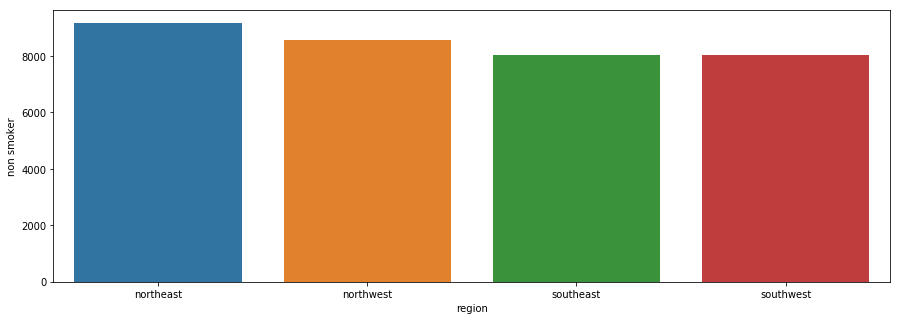

In [385]:
sns.barplot('region', 'non smoker' , data = dx)

[Text(0.5,1,'Charges for smoker in different regions')]

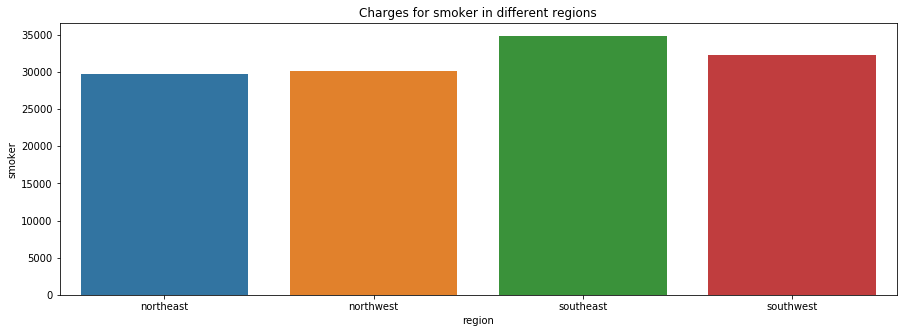

In [386]:
sns.barplot('region', 'smoker' , data = dx).set(title = 'Charges for smoker in different regions')

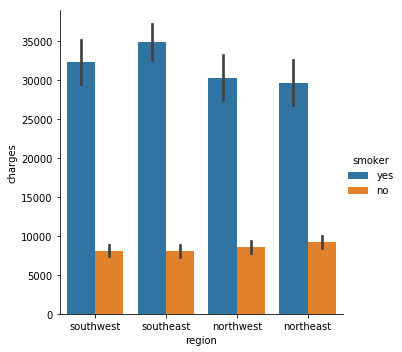

In [387]:
sns.catplot(x = 'region' , y = 'charges' , hue = 'smoker' , data = dataset , kind  = 'bar')

Let's look at BMI relation with charges


[Text(0.5,1,'Distribution of Body Mass Index')]

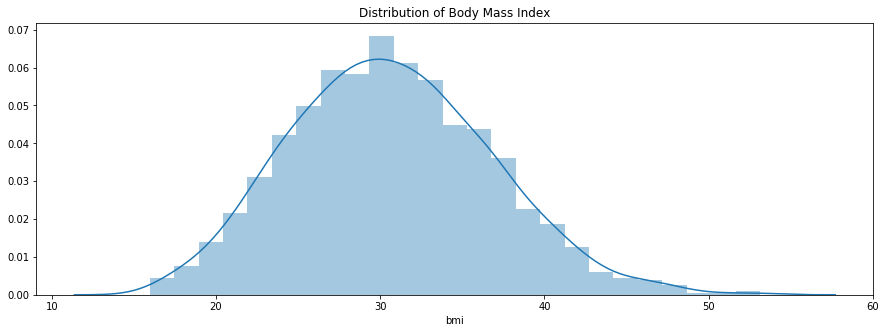

In [388]:
sns.distplot(dataset.bmi).set(title = 'Distribution of Body Mass Index')

[Text(0.5,0,'BMI'), Text(0.5,1,'BoxPlot for BMI')]

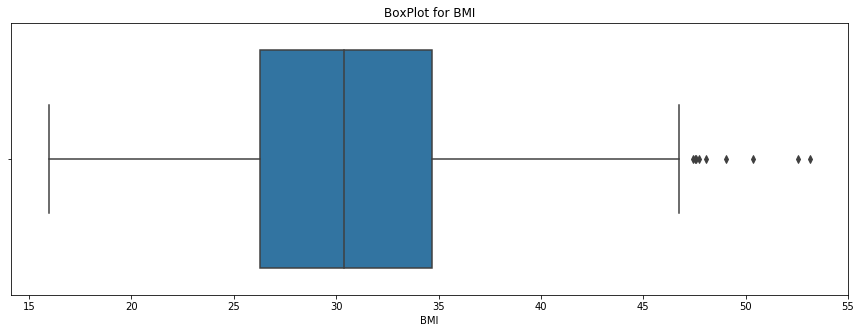

In [389]:
sns.boxplot(dataset.bmi).set(title = 'BoxPlot for BMI' , xlabel = 'BMI')

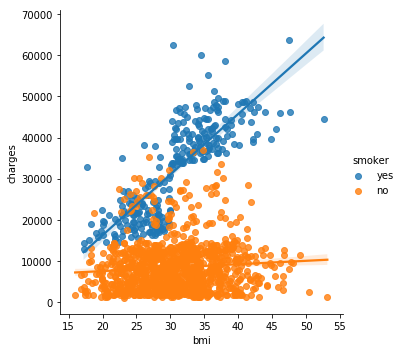

In [390]:
sns.lmplot(x = 'bmi' , y = 'charges' , hue = 'smoker' , data = dataset)

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


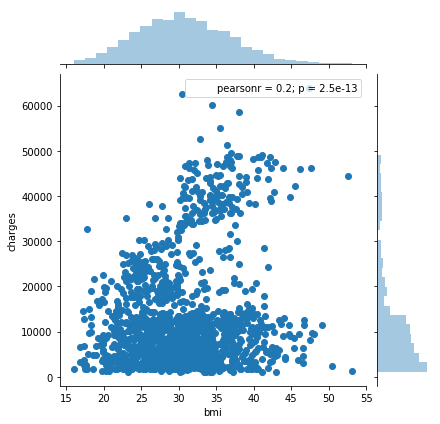

In [391]:
sns.jointplot(x = 'bmi' , y = 'charges' , data = dataset , kind = 'scatter').annotate(stats.pearsonr)

As we can see for smokers, bmi has very good correlation with charges

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


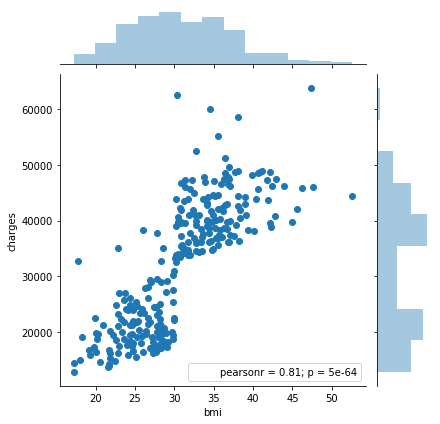

In [393]:
dx = dataset[dataset.smokerx == 1]
sns.jointplot(x = 'bmi' , y = 'charges' , data = dx , kind = 'scatter').annotate(stats.pearsonr)

Not such correlation with non smokers, we can say that for smokers bmi is a good predictor

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


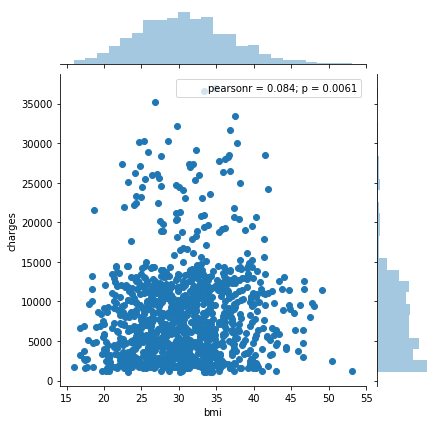

In [395]:
dx = dataset[dataset.smokerx == 0]
sns.jointplot(x = 'bmi' , y = 'charges' , data = dx , kind = 'scatter').annotate(stats.pearsonr)

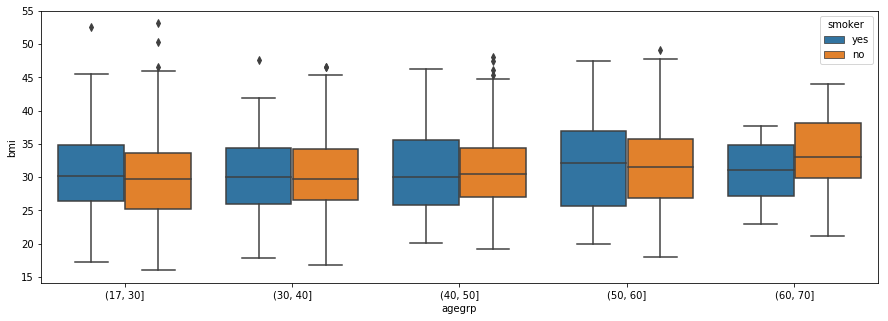

In [396]:
sns.boxplot(x = 'agegrp' , y = 'bmi' , hue = 'smoker' , data = dataset)

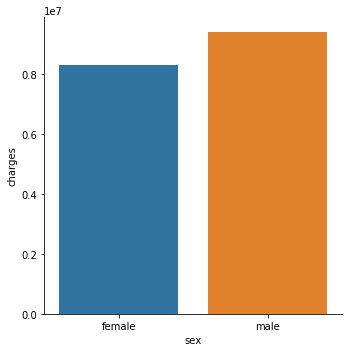

In [397]:
dx = dataset.groupby(['sex'])['charges'].sum().reset_index()
dx.columns = ['sex','charges']
sns.catplot(x = 'sex' , y = 'charges' , data = dx , kind = 'bar')

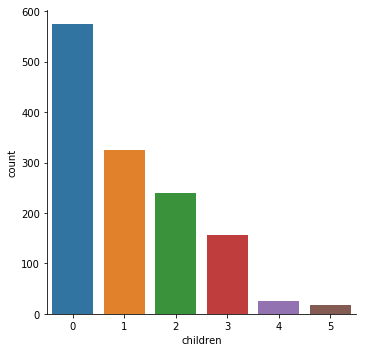

In [398]:
sns.catplot(x = 'children' , kind = 'count' , data = dataset)

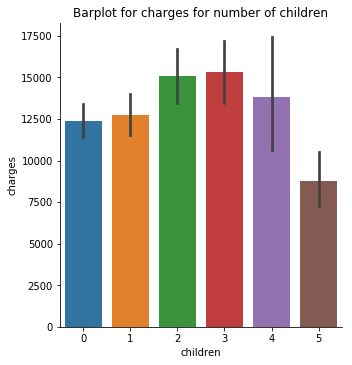

In [399]:
sns.catplot(x = 'children' , y = 'charges' , data = dataset , kind = 'bar').set(title = 'Barplot for charges for number of children')

In [400]:
dx = dataset.groupby(['children','smoker'])['charges'].mean().unstack().reset_index()
dx.columns = ['children' , 'no smoker' , 'smoker']
dx

,children,no smoker,smoker
0,0,7611.7933347908,31341.3639536522
1,1,8303.1093500380,31822.6543342623
2,2,9493.0936736757,33844.2357549091
3,3,9614.5193909322,32724.9152682051
4,4,12121.3444081818,26532.2769333333
5,5,8183.8455558824,19023.2600000000


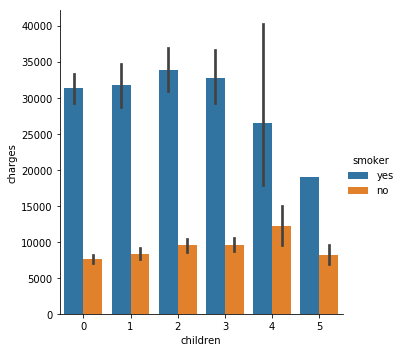

In [401]:
sns.catplot(x = 'children' , y = 'charges' , hue = 'smoker' , data = dataset , kind = 'bar')

In [402]:
dx = dataset.groupby(['children','smoker'])['bmi'].mean().unstack().reset_index()
dx.columns = ['children' , 'no smoker' , 'smoker']
dx

,children,no smoker,smoker
0,0,30.5519498911,30.5436956522
1,1,30.5648859316,30.8743442623
2,2,30.8811621622,31.3041818182
3,3,30.7384322034,30.5206410256
4,4,31.6754545455,29.3066666667
5,5,30.2700000000,18.3000000000


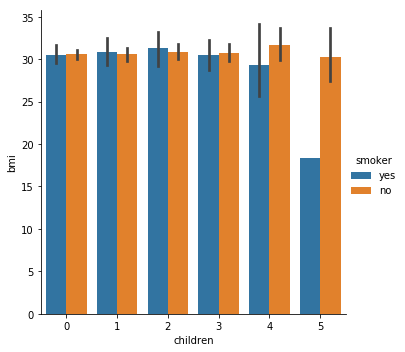

In [403]:
sns.catplot(x = 'children' , y = 'bmi' , hue = 'smoker' , data = dataset , kind = 'bar')

In [404]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score , accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures ,LabelBinarizer

In [406]:
encoder = LabelBinarizer()
c = encoder.fit_transform(dataset.region)
c = pd.DataFrame(c)
c.columns = ['NorthEast' , 'NorthWest' , 'SouthEast' , 'SouthWest']
c.head()

dataset = dataset.join(c)
dataset.head()

ValueError: columns overlap but no suffix specified: Index(['NorthEast', 'NorthWest', 'SouthEast', 'SouthWest'], dtype='object')

In [407]:
X = dataset.loc[:,['age','sexx','bmi','children','smokerx','NorthEast','NorthWest','SouthEast','SouthWest']].values
y = dataset.charges.values

In [408]:
X.shape

(1338, 9)

In [409]:
y.shape

(1338,)

In [410]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.8 , random_state = 42 , shuffle = True)

In [411]:
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(1070, 9) (1070,) (268, 9) (268,)


In [412]:
lin_reg = LinearRegression()
lin_reg.fit(X_train , y_train)
y_pred = lin_reg.predict(X_test)

lin_reg.score(X_test , y_test)

0.7835929767120723

In [413]:
pol_reg = PolynomialFeatures(degree = 2)
X_pol = pol_reg.fit_transform(X)

X_train , X_test , y_train , y_test = train_test_split(X_pol , y , train_size = 0.8 , random_state = 42 , shuffle = True)

lin_reg.fit(X_train,y_train)

lin_reg.score(X_test , y_test)

0.8652703246646869

In [414]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators = 100, criterion = 'mse')

random_forest.fit(X_train , y_train)

forest_train_pred = random_forest.predict(X_train)
forest_test_pred = random_forest.predict(X_test)
(random_forest.score(X_train , y_train) ,random_forest.score(X_test , y_test))

print('MSE train data: %.3f , MSE test data: %.3f' %(mean_squared_error(y_train , forest_train_pred) , 
                                                     mean_squared_error(y_test , forest_test_pred)))


print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3352701.497 , MSE test data: 20483322.972
R2 train data: 0.977, R2 test data: 0.868


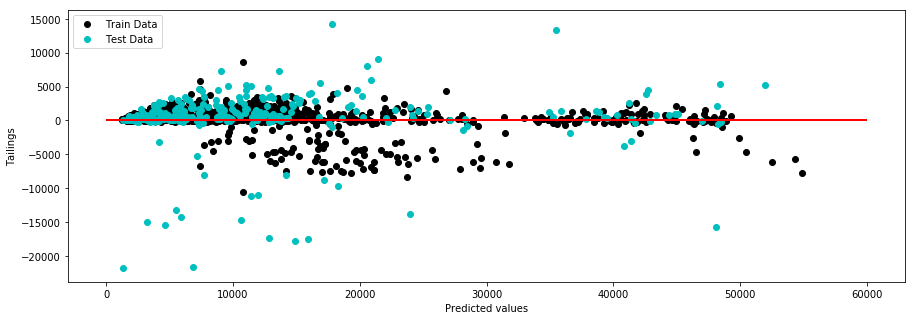

In [415]:
plt.scatter(forest_train_pred , forest_train_pred - y_train , c = 'black' , label = 'Train Data')

plt.scatter(forest_test_pred , forest_test_pred - y_test , c = 'c' , label = 'Test Data')

plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()